# 结构动力学 刘金波


## 欧拉梁

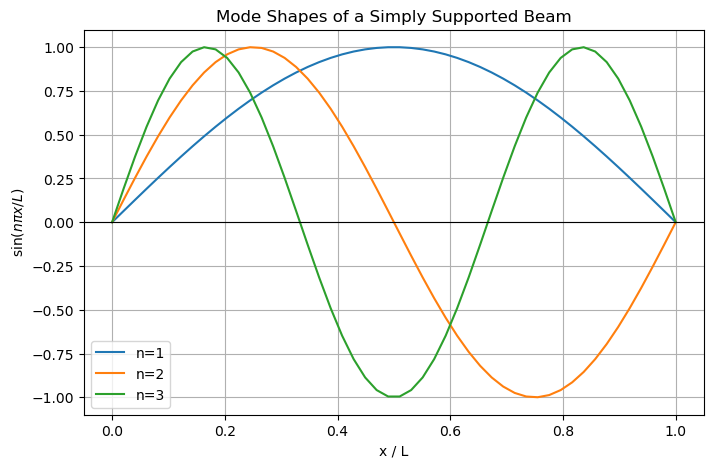

In [12]:
# 6-1 
import numpy as np
import matplotlib.pyplot as plt
# 参数设置
L = 1.0 # 梁长
# np.linspace(start, stop, num)是NumPy中的函数，用来生成等间距的数值序列。
x = np.linspace(0,L,50) # 空间坐标
modes = [1,2,3] # 需要绘制的振型阶数

plt.figure(figsize=(8,5))
for n in modes:
    y = np.sin(n*np.pi*x/L)
    plt.plot(x,y,label=f"n={n}")

# 图像格式
plt.title("Mode Shapes of a Simply Supported Beam")
plt.xlabel("x / L")
plt.ylabel(r"$\sin(n \pi x / L)$")
plt.axhline(0,color='black',linewidth=0.8)# 水平参考线
plt.legend()# 显示图曲线label
plt.grid(True)
plt.show()

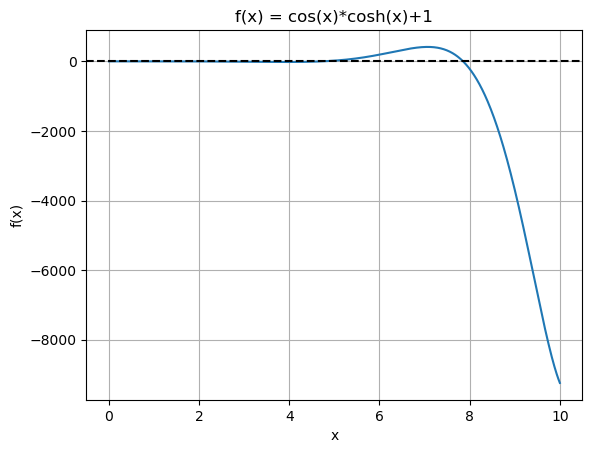

In [1]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.cos(x)*np.cosh(x)+1
x = np.linspace(0,10,1000)
y = f(x)

plt.plot(x,y,label='f(x)')
plt.axhline(0,color='k',linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('f(x) = cos(x)*cosh(x)+1')
plt.grid(True)
plt.show()

In [14]:
import numpy as np
def f(a): return np.cos(a)*np.cosh(a) + 1.0
def df(a): return -np.sin(a)*np.cosh(a) + np.cos(a)*np.sinh(a) # 导数

# 二分法
def bisection(f:callable,a,b,tol=1e-12,maxiter=200):
    """
    callable,表明可调用对象，可省略，写上是为了清晰
    f 函数参数
    tol 收敛精度
    maxiter 最大迭代次数
    """
    fa,fb = f(a),f(b)
    if fa*fb > 0: 
        raise ValueError("no sign change")
    for _ in range(maxiter):
        m = (a+b)/2
        fm = f(m)
        if (b-a)/2 < tol: # 区间长度已经足够小
            return m
        if abs(fm) < tol: # 函数值足够接近0
            return m
        # 缩小区间
        if fa*fm <= 0:
            b,fb = m,fm
        else:
            a,fa = m,fm
# 牛顿法快速迭代
def newton_refine(x0,f:callable,df:callable,tol=1e-14,maxiter=50):
    x = x0
    for _ in range(maxiter):
        fx = f(x)
        dfx = df(x)
        if abs(fx) < tol:
            return x
        if dfx == 0:
            break
        x -= fx/dfx
    return x
    
# 找前n个正根的函数
def find_roots(n=3,x_max=50,step=1e-3):
    """ 
    x_max: 搜索的最大值即区间[0,x_max]
    setp: 扫描步长，越小越精细
    """
    xs = np.arange(1e-6,x_max,step)
    # 每个点的函数值的数组
    vals = f(xs)
    # 零点列表
    roots = [] 
    for i in range(len(xs)-1):
        if vals[i]*vals[i+1] < 0:
            a,b = xs[i],xs[i+1]
            r_bis = bisection(f,a,b,tol=1e-12)
            r =newton_refine(r_bis,f,df)
            if not any(abs(r-rr)<1e-9 for rr in roots):
                roots.append(r)
                if len(roots) >= n:
                    break
    return roots

roots = find_roots(3)
for i,r in enumerate(roots,1):
    print(i,r)

1 1.8751040687119611
2 4.694091132974175
3 7.854757438237613


In [113]:
from sympy import Matrix,det,symbols,sin,cos,sinh,cosh,diff,Eq,solve,simplify,expand

In [114]:
# 定义符号
x,a,L,EI,w,M,J = symbols('x a L EI w M J')
A,B,C,D = symbols('A B C D')
# 定义Q(x)和各阶导
Q = A*sin(a*x) + B*cos(a*x) + C*sinh(a*x) + D*cosh(a*x)
Q1 = diff(Q,x)
Q2 = diff(Q,x,2)
Q3 = diff(Q,x,3)
# 定义边界条件
# 在x = 0
bc1 = Eq(Q.subs(x,0),0)
bc2 = Eq(Q1.subs(x,0),0)
# 在x=L
bc3 = Eq(EI*Q3.subs(x,L),-w**2*Q.subs(x,L)*M)
bc4 = Eq(EI*Q2.subs(x,L),-w**2*Q1.subs(x,L)*J)
subs_dict = {B:-D,A:-C}
Q_simpl = Q.subs(subs_dict)
Q1_simpl = Q1.subs(subs_dict)
Q2_simpl = Q2.subs(subs_dict)
Q3_simpl = Q3.subs(subs_dict)
bc3 = Eq(EI*Q3_simpl.subs(x,L),-w**2*Q_simpl.subs(x,L)*M)
bc4 = Eq(EI*Q2_simpl.subs(x,L),-w**2*Q1_simpl.subs(x,L)*J)
f1 = bc3.lhs-bc3.rhs
f2 = bc4.lhs-bc4.rhs
f1_expend = expand(f1)
f2_expend = expand(f2)
f1_c = f1_expend.coeff(C)
f1_d = f1_expend.coeff(D)
f2_c = f2_expend.coeff(C)
f2_d = f2_expend.coeff(D)
M_c = Matrix([
    [f1_c,f1_d],
    [f2_c,f2_d],
])
M_c

Matrix([
[    EI*a**3*cos(L*a) + EI*a**3*cosh(L*a) - M*w**2*sin(L*a) + M*w**2*sinh(L*a),    -EI*a**3*sin(L*a) + EI*a**3*sinh(L*a) - M*w**2*cos(L*a) + M*w**2*cosh(L*a)],
[EI*a**2*sin(L*a) + EI*a**2*sinh(L*a) - J*a*w**2*cos(L*a) + J*a*w**2*cosh(L*a), EI*a**2*cos(L*a) + EI*a**2*cosh(L*a) + J*a*w**2*sin(L*a) + J*a*w**2*sinh(L*a)]])

In [116]:
det_eq = M_c.det()
det_eq

EI**2*a**5*sin(L*a)**2 + EI**2*a**5*cos(L*a)**2 + 2*EI**2*a**5*cos(L*a)*cosh(L*a) - EI**2*a**5*sinh(L*a)**2 + EI**2*a**5*cosh(L*a)**2 + 2*EI*J*a**4*w**2*sin(L*a)*cosh(L*a) + 2*EI*J*a**4*w**2*cos(L*a)*sinh(L*a) - 2*EI*M*a**2*w**2*sin(L*a)*cosh(L*a) + 2*EI*M*a**2*w**2*cos(L*a)*sinh(L*a) - J*M*a*w**4*sin(L*a)**2 - J*M*a*w**4*cos(L*a)**2 + 2*J*M*a*w**4*cos(L*a)*cosh(L*a) + J*M*a*w**4*sinh(L*a)**2 - J*M*a*w**4*cosh(L*a)**2